# 생선의 길이를 사용하여 무게를 예측

In [26]:
import numpy as np

In [27]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [28]:
import matplotlib.pyplot as plt

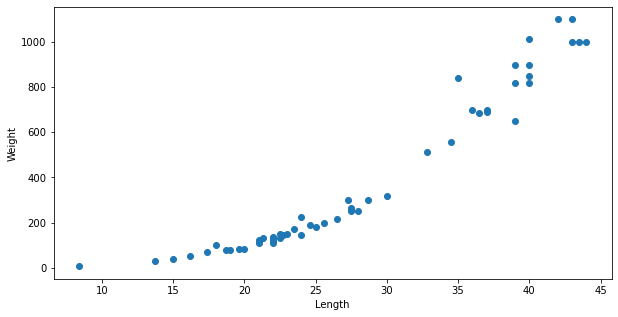

In [29]:
plt.figure(figsize=(10,5))
# fish_length :Feature column, fish_weight : targetcolumn,
plt.scatter(fish_length,fish_weight)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

### Train Set, Test Set의 분리

In [30]:
from sklearn.model_selection import  train_test_split

In [31]:
train_input, test_input, train_target, test_target = \
    train_test_split(fish_length, fish_weight,random_state=42)
    # random_state = 는 수업할 떄만 씀

> KNN 분류에서 사용되었던 stratify는 분류문제가 아니므로 사용하지 않는다.

In [32]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)

(42,) (14,)


In [33]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

# reshape를 통해 1차원을 2차원 배열로 바꾸어준다.

### 1열로 구성된 배열로 재구성

In [34]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
# 데이터를 T모양으로 행과열을 바꿈 -1

In [35]:
# slicing
train_input[:10]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ]])

In [36]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)
# 42행 1열 

(42, 1) (14, 1)


> 2차원으로 만들어서 분석에 사용가능하다.

### 회귀모델 사용

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knr = KNeighborsRegressor()
# 학습
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [39]:
# 예측
knr.score(test_input, test_target)

0.992809406101064

### 회귀모델은 분포모델처럼 예측값과 정답값을 비교할 수 없음
### 결정계수($R^2$) : 평균 절대값 오차
#### $R^2$ = 1- ($타깃-예측)^2의 합 / ($타깃 - 평균)^2의 합

In [40]:
from sklearn.metrics import mean_absolute_error

In [41]:
# 테스트 세트에 대한 예측을 만든다
test_prediction  = knr.predict(test_input)
# 테스트 세트에 대한 평균 절대값 오차를 계산 
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


### 과대적합(Overfitting)과 과소적합(Underfitting)

In [42]:
# train data 로 score 측정
knr.score(train_input,train_target)

0.9698823289099254

In [43]:
# test data 로 score 측정
knr.score(test_input, test_target)
# 테스트가 더 낮음, 더 학습이 필요함

0.992809406101064

> train보다 test의 점수가 잘 나왔을 경우를 과소적합이라고 한다.
> 보통은 train점수가 test의 점수보다 조금 더 잘나온 과대적합을 기준으로 한다. 

### knn의 hyper parameter을 조절하자

In [48]:
# 이웃의 갯수가 default는 5, 이웃의 갯수를 3으로 설정한다.
# 과소적합을 과대적합으로 만들기 위해 이웃의 갯수를 줄인다.
knr.n_neighbors = 3

# 모델을 다시 훈련한다. 
knr.fit(train_input,train_target)
print("train score : ",knr.score(train_input,train_target))
print("test score : ",knr.score(test_input,test_target))

train score :  0.9804899950518966
test score :  0.9746459963987609


> 과대적합이 이루어졌다.

In [51]:
knr.n_neighbors = 11

# 모델을 다시 훈련한다. 
knr.fit(train_input,train_target)
print("train score : ",knr.score(train_input,train_target))
print("test score : ",knr.score(test_input,test_target))

train score :  0.9515761381539326
test score :  0.970279643030474


In [52]:
knr.n_neighbors = 29

# 모델을 다시 훈련한다. 
knr.fit(train_input,train_target)
print("train score : ",knr.score(train_input,train_target))
print("test score : ",knr.score(test_input,test_target))

train score :  0.624794145796598
test score :  0.6434914820757357


> n_neighbors를 늘리면 과대적합이 발생하고 예측력이 떨어진다.

---
### 이웃의 갯수 조절로 확인

K ===> 1
Train : 0.9852830341215901
Test : 0.991309195814175


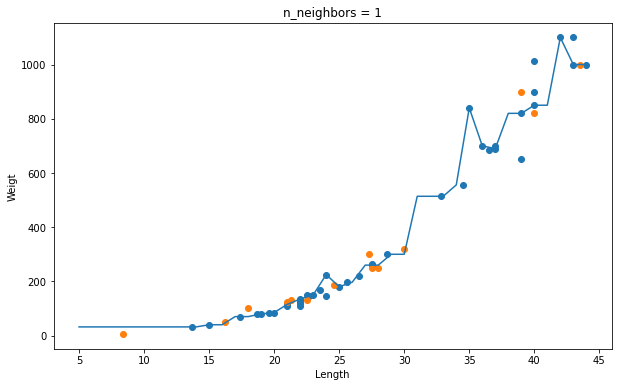

K ===> 3
Train : 0.9804899950518966
Test : 0.9746459963987609


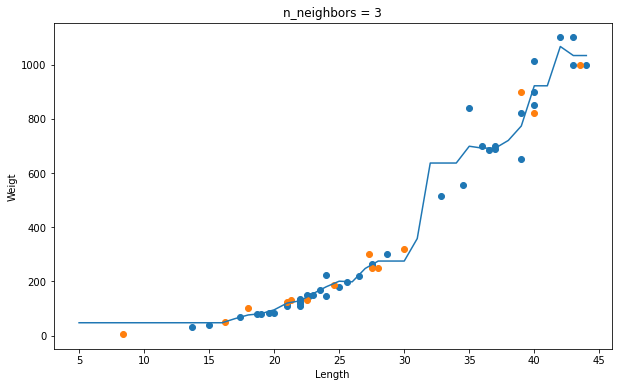

K ===> 5
Train : 0.9698823289099254
Test : 0.992809406101064


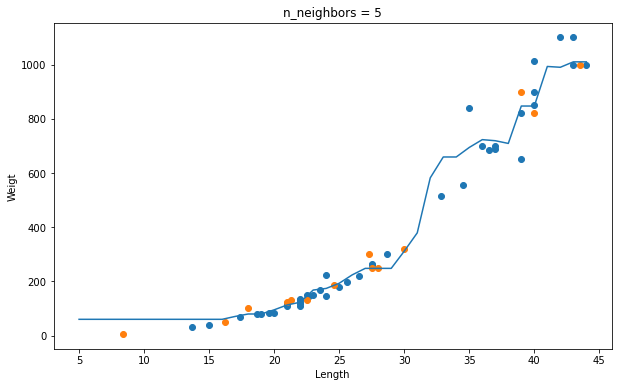

K ===> 10
Train : 0.96164569026043
Test : 0.9737908255822255


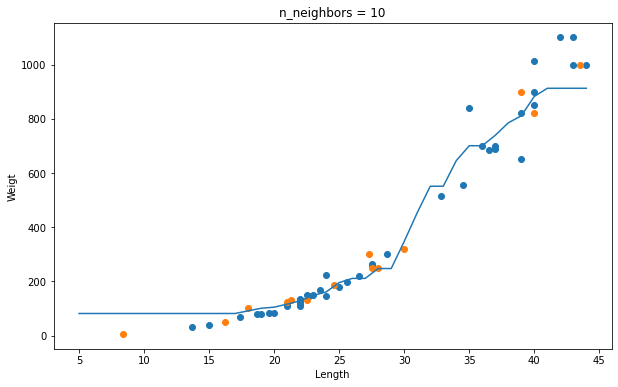

In [56]:
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듭니다.
x = np.arange(5,45).reshape(-1,1) # reshape -1하나의 열로 만듦

# n = 1,3,5,10 일때 예측 결과를 그래프로 그리기
# 이웃의 갯수
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    print("K ===>",n)
    print("Train :", knr.score(train_input,train_target))
    print("Test :", knr.score(test_input,test_target))

    # 지정한 범위 x 에 대한 예측 구하기 
    prediction = knr.predict(x)

    # 훈련세트와 검증세트의 예측 결과 그래프로 그리기
    plt.figure(figsize=(10,6))
    # 점
    plt.scatter(train_input,train_target)
    plt.scatter(test_input,test_target)
    # 선
    plt.plot(x,prediction)
    plt.title("n_neighbors = %d"%n)
    plt.xlabel("Length")
    plt.ylabel("Weigt")
    plt.show()

k= 1일때 선이 데이터를 지나면서 맞추면 train data는 잘맞추나 test data는 못 맞추므로 (일반화)
선을 지나다니는 게 아닌 그 주변으로 해야 train과 test 둘다 적절히 맞출 수 있다.

In [53]:
# 최대값 확인
np.max(fish_length)

44.0